# [0] 베이지안 최적화

- 사전 정보를 기반으로 최적 하이퍼파라미터값을 확률적으로 추정하여 탐색하는 기법이다.
- 1개의 알고리즘을 최적 파라미터로 끌어올리는 최종 방법!
- 그리드 서치, 랜덤서치보다 더 빠르고, 효율적
- 절차
    - 하이퍼파라미터 탐색 범위 설정
    - 평가지표 계산 함수 정의(커스텀, 성능평가함수)
    - BayesianOptimization 객체 생성
        - !pip install bayesian-optimization
    - 베이지안 최적화 수행

In [ ]:
!pip install bayesian-optimization==1.4.2

In [ ]:
from bayes_opt import BayesianOptimization

## 베이스라인

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
# 사이킷런 유방암 데이터 -> RandomForest로 학습

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 데이터 load
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

# 모델 로드
rf_clf = RandomForestClassifier()

# 학습
rf_clf.fit(X_train, y_train)

# 예측결과
pred_y = rf_clf.predict(X_test)

# 정확도 확인
score = accuracy_score(y_test, pred_y)
print(score)

0.9440559440559441


## 베이지안 최적화 루틴 생성

In [ ]:
from bayes_opt import BayesianOptimization # 범위를 넓게 지정 가능 + 한 알고리즘의 성능 극대화!
RandomForestClassifier()
# 파라미터 구성
param_bound = {
    'n_estimators':(10,100),
    'min_samples_split':(2,5),
    'min_samples_leaf':(2,5),
    'max_depth':(2,10),
    'max_leaf_nodes':(2,100)
}
def my_func(n_estimators, min_samples_split, min_samples_leaf, max_depth, max_leaf_nodes ):
    # 모델 로드
    rf_clf = RandomForestClassifier(n_estimators = int(n_estimators),
                                    min_samples_split = int(min_samples_split),
                                    min_samples_leaf = int(min_samples_leaf),
                                    max_depth = int(max_depth),
                                    max_leaf_nodes = int(max_leaf_nodes)
                                    )

    # 학습
    rf_clf.fit(X_train, y_train)

    # 예측 및 평가 => 정확도(혹은 다른 평가 지표)를 리턴
    return rf_clf.score(X_test, y_test)

optimizer = BayesianOptimization(f=my_func, pbounds = param_bound, random_state = 77)

## 최적화 진행

In [ ]:
'''
    - init_points : 초기 랜덤 서치 개수 (default : 5)
    - n_inter : 반복 횟수 -> 값이 클수록 정확도가 올라갈 확률이 높다 -> 시간 많이 소요 (default : 25)
    - acq : Acquisition Function -> 후보들 3가지가 존재, ei (Expected Improvement) 가장 많이 사용한다! [최적값을 찾아가는 전개 방식임] => 거의 고정값으로 봐도 무방
    - xi : exploration -> 강도 (기본값은 None = 0)
'''
optimizer.maximize(init_points = 10, n_iter = 100, acq = 'ei', xi = 0.01)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9371    | 9.353     | 64.94     | 4.261     | 2.418     | 17.86     |
| 2         | 0.951     | 8.304     | 33.96     | 3.623     | 2.721     | 59.09     |


<ipython-input-32-ff5ea28ba445>:7: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  optimizer.maximize(init_points = 10, n_iter = 100, acq = 'ei', xi = 0.01)


| 3         | 0.951     | 5.204     | 72.09     | 4.51      | 3.765     | 36.65     |
| 4         | 0.9441    | 4.248     | 71.15     | 3.268     | 2.172     | 77.23     |
| 5         | 0.9371    | 5.619     | 19.23     | 2.148     | 2.877     | 16.01     |
| 6         | 0.951     | 8.009     | 8.25      | 3.296     | 3.093     | 23.68     |
| 7         | 0.9441    | 6.374     | 45.44     | 2.108     | 4.469     | 34.6      |
| 8         | 0.9371    | 3.352     | 65.15     | 2.323     | 3.06      | 44.71     |
| 9         | 0.951     | 5.564     | 97.75     | 4.188     | 2.937     | 90.53     |
| 10        | 0.951     | 8.266     | 27.68     | 2.928     | 2.388     | 48.0      |
| 11        | 0.951     | 4.807     | 99.11     | 3.881     | 4.413     | 36.65     |
| 12        | 0.951     | 7.85      | 33.93     | 4.454     | 2.318     | 59.05     |
| 13        | 0.9441    | 8.695     | 25.94     | 4.174     | 2.51      | 56.31     |
| 14        | 0.958     | 6.183     | 34.97     | 3.12

In [ ]:
optimizer.max
# 최고정확도는 : 'target'
# 이를 위한 파라미터는 아래와 같은 , 알고리즘의 랜덤 스테이트를 고정해야 재현이 가능하다!

{'target': 0.965034965034965,
 'params': {'max_depth': 8.348369711318483,
  'max_leaf_nodes': 11.1513660405021,
  'min_samples_leaf': 2.780693717685647,
  'min_samples_split': 2.7310706768309756,
  'n_estimators': 70.76700778666697}}

# [1] AutoML-파이캐럿 - 분류

- 기계 학습 워크플로우를 자동화하는 파이썬의 오픈소스
- AutoML 계열 제품들 중 하나임
- https://pycaret.gitbook.io/docs/
- 설치
    - !pip install pycaret
    - 단, sklearn과 상호 충돌이 있으면 버전 조정(사이킷런)
    

In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 70.6 MB/s eta 0:0

In [ ]:
# catboost가 선정되는 확률 비교적 높으므로 별도 설치한다.
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
# xgboost 업그레이드
!pip install --upgrade -q xgboost

## 모듈 버전 확인
- 항상 버전을 정리해두는 습관을 만들자
- 만약 여러 버전이 통합될경우 작동이 되지 않는 경우가 발생할 수 있음

In [ ]:
import pycaret
pycaret.__version__
# 3.0.4

'3.0.4'

In [ ]:
import xgboost
xgboost.__version__
# 1.7.6

'1.7.6'

In [ ]:
import catboost
catboost.__version__
# 1.2.1

'1.2.1'

In [ ]:
import sklearn
sklearn.__version__
# 1.2.2

'1.2.2'

## 데이터 준비

## 자동으로 모델 찾기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 데이터 load
cancer = load_breast_cancer()

pd.DataFrame

X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns = cancer.feature_names)
df[cancer.target_names[0]] = y

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], stratify=df.iloc[:,-1:], random_state = 7, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512, 1), (57, 1))

In [ ]:
X = pd.concat([X_train, y_train], axis = 1)
X.shape

(512, 31)

### Setup

### 파라미터

data : 사용할 데이터를 입력해 줍니다.

target : data에서 어떤 데이터를 target으로 할 지 입력합니다. 우리는 투표이기 때문에 "voted"를 입력할 예정입니다.

train_size : train_test_split과 동일하다고 생각하시면 됩니다. train_size만큼 학습하고, 나머지는 validation data로 사용합니다.

sample_estimator : 어떤 모델로 예측해 볼 것인지를 입력합니다. 입력하지 않으면 Logistic Regression Model이 자동으로 사용됩니다. 이 sample_estimator를 통해서 다양한 것들을 예측하는데, 대표적으로 train_size를 몇으로 사용할지를 정할 수 있습니다.

categorical_features : 범주형 변수를 여기에 입력할 수 있습니다.

silent : True로 설정하면, 입력된 데이터의 형태에 따라서 알아서 데이터를 조정합니다.

remove_perfect_collinearity : True로 설정하면 상관관계가 1인 피쳐를 삭제합니다.

fix_imbalance : True로 설정하면 SMOTE를 적용합니다. SMOTE는 클래스가 적은 데이터의 표본을 임의의 값으로 변형해 데이터를 추가하는 방법입니다.

fix_imbalance_method : imblearn에서 제공하는 다양한 모듈을 적용할 수 있습니다.

data_split_shuffle : False로 설정하면 데이터 split을 할 때 shuffle하는 것을 막습니다.

folds_shuffle : False로 설정하면 cross-validation을 할 때 shuffle하는 것을 막습니다.

n_jobs : 몇개의 processor를 이용할지 입력할 수 있습니다.

log_experiment : True로 설정하면 로그를 MLFlow 서버에 기록합니다.

experiment_name : 로그를 기록할 때 사용할 이름입니다.

log_plots : True로 설정하면 MLFlow에 정확한 plot이 기록됩니다.

log_profile : True로 설정하면 html파일이 MLFlow에 저장됩니다.

log_data : True로 설정하면 train, test 데이터가 csv파일로 저장됩니다.

verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data = X # 데이터 => df로 공급해야함
      ,target = cancer.target_names[0] # X의 데이터중 어떤 칼럼이 정답인지 설정
      ,verbose = True # 진행 로그 출력
      ,train_size = 0.9 # 내부적으로 검증시 훈련데이터의 비율
      ,data_split_shuffle = True # 데이터 split시 데이터를 섞을것인지 여부
      ,normalize = True # 정규화 처리 진행
      ,session_id = 100 # 난수 시드
      )

,Description,Value
0,Session id,100
1,Target,malignant
2,Target type,Binary
3,Original data shape,"(512, 31)"
4,Transformed data shape,"(512, 31)"
5,Transformed train set shape,"(460, 31)"
6,Transformed test set shape,"(52, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


### 후보 모델 리스트업

- 체크 가능한 모델 리스트업

In [ ]:
# 서드파트 모델은 사전에 설치해야 볼 수 있음
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 최적 모델 자동으로 찾기

- 상위그룹 n개 지정 가능 (ex : top 5)

In [ ]:
'''
    n_select : 상위 몇개까지 후보군을 추출할지 설정
    sort : 평가 기준
    fold : 교차 검증의 세트수
    round : 총 시도 횟수 => 3회 => 평균 정확도
'''

top_5_model = compare_models(fold = 5, round = 3, sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.972,0.992,0.990,0.966,0.978,0.939,0.940,1.466
catboost,CatBoost Classifier,0.967,0.988,0.983,0.966,0.974,0.930,0.930,10.356
xgboost,Extreme Gradient Boosting,0.965,0.985,0.972,0.972,0.972,0.926,0.926,0.442
rf,Random Forest Classifier,0.963,0.983,0.979,0.963,0.971,0.920,0.921,0.876
et,Extra Trees Classifier,0.959,0.991,0.969,0.966,0.967,0.912,0.912,0.972
knn,K Neighbors Classifier,0.954,0.986,0.979,0.950,0.964,0.901,0.903,0.114
qda,Quadratic Discriminant Analysis,0.952,0.987,0.955,0.968,0.961,0.899,0.899,0.110
ada,Ada Boost Classifier,0.950,0.977,0.958,0.963,0.960,0.893,0.894,0.388
ridge,Ridge Classifier,0.948,0.000,0.993,0.929,0.960,0.885,0.890,0.148
lightgbm,Light Gradient Boosting Machine,0.946,0.983,0.965,0.949,0.957,0.883,0.884,0.856


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:
# 상위 5개 확인
top_5_model

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimator

### 블렌딩

- 앙상블 보팅 작업 진행

In [ ]:
blended = blend_models(estimator_list = top_5_model,
             fold = 10,
             method = 'soft' # hard(다수결), soft(평균)
             ,optimize = 'Accuracy' #정확도로 평가
            )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9348,0.9777,0.9655,0.9333,0.9492,0.8583,0.8593
2,0.9348,0.9838,1.0000,0.9062,0.9508,0.8547,0.8639
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9783,0.9959,0.9655,1.0000,0.9825,0.9539,0.9549
5,0.9565,0.9939,0.9655,0.9655,0.9655,0.9067,0.9067
6,0.9348,0.9757,0.9655,0.9333,0.9492,0.8583,0.8593
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9783,1.0000,0.9643,1.0000,0.9818,0.9548,0.9558


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 최종 모델 추출

In [ ]:
model = finalize_model(blended)
model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mean radius', 'mean texture',
                                             'mean perimeter', 'mean area',
                                             'mean smoothness',
                                             'mean compactness',
                                             'mean concavity',
                                             'mean concave points',
                                             'mean symmetry',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'perimeter error', 'area error',
                                             'smoothness...
                                                                    criterion='gini',
                                                                    max_depth=None,
                                                                    max_features='sqrt',
                                                                    max_leaf_nodes=None,
                                                                    max_samples=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_samples_leaf=1,
                                                                    min_samples_split=2,
                                                                    min_weight_fraction_leaf=0.0,
                                                                    n_estimators=100,
                                                                    n_jobs=-1,
                                                                    oob_score=False,
                                                                    random_state=100,
                                                                    verbose=0,
                                                                    warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

### 예측

In [ ]:
y_pred = predict_model(model, data = X_test)
y_pred.head(2) # 원래 아는 방식과 다르게 다른 여러 지표가 포함되어서 결과가 나옴!

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prediction_label,prediction_score
327,12.030000,17.930000,76.089996,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,82.739998,523.400024,0.1013,0.0739,0.007732,0.02796,0.2171,0.07037,1,0.9977
393,21.610001,22.280001,144.399994,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,...,172.000000,2081.000000,0.1502,0.5717,0.705300,0.24220,0.3828,0.10070,0,0.9999


In [ ]:
accuracy_score(y_test.malignant, y_pred.prediction_label)

0.9824561403508771

## 직접 모델을 생성해서 최적모델 찾기 - 반자동

### 모델 생성

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# 데이터가 많으면 오래걸리기 때문에 후보군을 미리 선정해서 진행한다.
model_gbc = create_model('gbc', fold = 5)
model_cbc = create_model('catboost', fold = 5)
model_lgb = create_model('lightgbm', fold = 5)
model_xgb = create_model('xgboost', fold = 5)
model_lda = create_model('lda', fold = 5)
model_lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9457,0.9508,0.9655,0.9492,0.9573,0.8827,0.8829
1,0.9457,0.9828,0.9655,0.9492,0.9573,0.8827,0.8829
2,0.9348,0.9909,0.9655,0.9333,0.9492,0.8583,0.8593
3,0.9022,0.9855,0.8947,0.9444,0.9189,0.7959,0.7977
4,0.9783,0.9995,0.9825,0.9825,0.9825,0.9539,0.9539
Mean,0.9413,0.9819,0.9547,0.9517,0.9530,0.8747,0.8753
Std,0.0244,0.0166,0.0307,0.0164,0.0204,0.0508,0.0501


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9696,0.9828,0.9500,0.9661,0.9055,0.9066
1,0.9783,0.9909,1.0000,0.9667,0.9831,0.9528,0.9538
2,0.9565,0.9914,0.9655,0.9655,0.9655,0.9067,0.9067
3,0.9674,0.9885,0.9825,0.9655,0.9739,0.9304,0.9307
4,0.9783,0.9985,0.9825,0.9825,0.9825,0.9539,0.9539
Mean,0.9674,0.9878,0.9826,0.9660,0.9742,0.9299,0.9303
Std,0.0097,0.0097,0.0109,0.0103,0.0076,0.0211,0.0211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9239,0.9640,0.9310,0.9474,0.9391,0.8377,0.8379
1,0.9674,0.9863,0.9828,0.9661,0.9744,0.9296,0.9298
2,0.9130,0.9787,0.9655,0.9032,0.9333,0.8087,0.8125
3,0.9457,0.9885,0.9649,0.9483,0.9565,0.8841,0.8843
4,0.9783,0.9990,0.9825,0.9825,0.9825,0.9539,0.9539
Mean,0.9457,0.9833,0.9653,0.9495,0.9572,0.8828,0.8837
Std,0.0248,0.0116,0.0188,0.0265,0.0191,0.0543,0.0533


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9670,0.9655,0.9655,0.9655,0.9067,0.9067
1,0.9783,0.9883,1.0000,0.9667,0.9831,0.9528,0.9538
2,0.9565,0.9853,0.9655,0.9655,0.9655,0.9067,0.9067
3,0.9457,0.9835,0.9474,0.9643,0.9558,0.8853,0.8856
4,0.9891,1.0000,0.9825,1.0000,0.9912,0.9771,0.9773
Mean,0.9652,0.9848,0.9722,0.9724,0.9722,0.9257,0.9260
Std,0.0160,0.0106,0.0178,0.0138,0.0129,0.0338,0.0340


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.9422,0.9828,0.8769,0.9268,0.7807,0.7923
1,0.9565,0.9899,1.0000,0.9355,0.9667,0.9044,0.9085
2,0.9457,0.9980,1.0000,0.9206,0.9587,0.8797,0.8861
3,0.9565,0.9960,0.9825,0.9492,0.9655,0.9067,0.9077
4,0.9565,0.9970,1.0000,0.9344,0.9661,0.9057,0.9097
Mean,0.9435,0.9846,0.9930,0.9233,0.9568,0.8754,0.8809
Std,0.0211,0.0214,0.0085,0.0249,0.0152,0.0484,0.0451


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9348,0.9746,0.9655,0.9333,0.9492,0.8583,0.8593
1,0.9783,0.9934,1.0000,0.9667,0.9831,0.9528,0.9538
2,0.9783,0.9980,1.0000,0.9667,0.9831,0.9528,0.9538
3,0.9783,0.9965,0.9825,0.9825,0.9825,0.9539,0.9539
4,0.9891,0.9960,1.0000,0.9828,0.9913,0.9768,0.9771
Mean,0.9717,0.9917,0.9896,0.9664,0.9778,0.9389,0.9396
Std,0.0190,0.0087,0.0138,0.0180,0.0147,0.0413,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 튜닝

- estimator : 사용할 모델을 입력
- fold : K-fold의 수로, 최소 2 이상의 숫자
- round : 점수 반올림으로 표시할 자리
- n_iter : Random Grid Search를 한 회차당 반복할 회수
- custom_grid : 직접 파라미터의 범위를 조정
- optimize : 파라미터 튜닝 과정에서 어떤 점수를 따라갈 것인지 선택 가능. 'Accuracy','AUC','Recall','Precision', 'F1'
- choose_better : True로 설정하면 성능이 높아지지 않을 경우 tuning을 하지 않은 모델을 반환
- verbose : True로 설정하면 로그 출력

In [ ]:
# 데이터가 많으면 오래걸리기 때문에 후보군을 미리 선정해서 진행한다.
tune_model_gbc = tune_model(model_gbc, fold = 5, optimize = 'AUC', choose_better = True)
tune_model_cbc = tune_model(model_cbc, fold = 5, optimize = 'AUC', choose_better = True)
tune_model_lgb = tune_model(model_lgb, fold = 5, optimize = 'AUC', choose_better = True)
tune_model_xgb = tune_model(model_xgb, fold = 5, optimize = 'AUC', choose_better = True)
tune_model_lda = tune_model(model_lda, fold = 5, optimize = 'AUC', choose_better = True)
tune_model_lr = tune_model(model_lr, fold = 5, optimize = 'AUC', choose_better = True)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6304,0.9787,1.0000,0.6304,0.7733,0.0000,0.0000
1,0.6304,0.9863,1.0000,0.6304,0.7733,0.0000,0.0000
2,0.6304,0.9909,1.0000,0.6304,0.7733,0.0000,0.0000
3,0.6196,0.9810,1.0000,0.6196,0.7651,0.0000,0.0000
4,0.6196,0.9965,1.0000,0.6196,0.7651,0.0000,0.0000
Mean,0.6261,0.9867,1.0000,0.6261,0.7700,0.0000,0.0000
Std,0.0053,0.0065,0.0000,0.0053,0.0040,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9457,0.9640,0.9655,0.9492,0.9573,0.8827,0.8829
1,0.9565,0.9914,1.0000,0.9355,0.9667,0.9044,0.9085
2,0.9348,0.9914,0.9655,0.9333,0.9492,0.8583,0.8593
3,0.9457,0.9880,0.9474,0.9643,0.9558,0.8853,0.8856
4,0.9783,0.9995,0.9825,0.9825,0.9825,0.9539,0.9539
Mean,0.9522,0.9868,0.9722,0.9529,0.9623,0.8969,0.8980
Std,0.0147,0.0120,0.0178,0.0185,0.0115,0.0320,0.0320


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9457,0.9640,0.9828,0.9344,0.9580,0.8812,0.8834
1,0.9565,0.9929,0.9828,0.9500,0.9661,0.9055,0.9066
2,0.9348,0.9843,0.9655,0.9333,0.9492,0.8583,0.8593
3,0.9457,0.9900,0.9474,0.9643,0.9558,0.8853,0.8856
4,0.9783,0.9995,0.9649,1.0000,0.9821,0.9544,0.9554
Mean,0.9522,0.9861,0.9687,0.9564,0.9622,0.8970,0.8980
Std,0.0147,0.0121,0.0132,0.0246,0.0113,0.0324,0.0323


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9348,0.9701,0.9828,0.9194,0.9500,0.8565,0.8605
1,0.9565,0.9904,1.0000,0.9355,0.9667,0.9044,0.9085
2,0.9239,0.9868,0.9828,0.9048,0.9421,0.8316,0.8377
3,0.9783,0.9905,1.0000,0.9661,0.9828,0.9534,0.9544
4,0.9674,0.9990,0.9825,0.9655,0.9739,0.9304,0.9307
Mean,0.9522,0.9873,0.9896,0.9382,0.9631,0.8953,0.8984
Std,0.0202,0.0095,0.0085,0.0245,0.0150,0.0453,0.0434


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.9681,0.9828,0.8906,0.9344,0.8063,0.8150
1,0.9565,0.9929,1.0000,0.9355,0.9667,0.9044,0.9085
2,0.9457,0.9965,1.0000,0.9206,0.9587,0.8797,0.8861
3,0.9565,0.9955,0.9825,0.9492,0.9655,0.9067,0.9077
4,0.9674,1.0000,1.0000,0.9500,0.9744,0.9297,0.9320
Mean,0.9478,0.9906,0.9930,0.9292,0.9599,0.8854,0.8899
Std,0.0187,0.0115,0.0085,0.0221,0.0137,0.0426,0.0402


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9348,0.9767,1.0000,0.9062,0.9508,0.8547,0.8639
1,0.9783,0.9924,1.0000,0.9667,0.9831,0.9528,0.9538
2,0.9565,0.9980,1.0000,0.9355,0.9667,0.9044,0.9085
3,0.9674,0.9935,0.9825,0.9655,0.9739,0.9304,0.9307
4,0.9783,1.0000,1.0000,0.9661,0.9828,0.9534,0.9544
Mean,0.9630,0.9921,0.9965,0.9480,0.9714,0.9191,0.9223
Std,0.0163,0.0082,0.0070,0.0240,0.0120,0.0369,0.0338


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
candidate_models    = [
    tune_model_gbc,
    tune_model_cbc,
    tune_model_lgb,
    tune_model_lda,
    tune_model_lr,
    tune_model_xgb
]

### 검증 모델

- setup environment에서 train_size = 0.9, 여기서는 0.1을 가지고 검증
- estimator : 사용할 모델
- data : 다른 데이터를 직접 입력다. 단 SETUP과 같은 형태여야만함
- probability_threshold : default는 0.5로 지정
- platform : cloud에서 모델을 불러올 수 있음
- authentication : 인증된 토큰을 입력
(플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태
- verbose : True로 설정하면 로그출력

In [ ]:
for tune_model in candidate_models:
    display(predict_model(tune_model))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6346,0.9984,1.0000,0.6346,0.7765,0.0000,0.0000


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.6261
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,0.6261
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.6261
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.6261
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.6261
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.6261
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.6261
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,1,0.6261
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,0.6261
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,0.6261


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9808,1.0000,1.0000,0.9706,0.9851,0.9581,0.9589


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.9850
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,0.9986
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.9927
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.9986
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.9969
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.9959
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.9771
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,0,0.9945
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,0.9993
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,0.9986


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9808,1.0000,1.0000,0.9706,0.9851,0.9581,0.9589


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.9848
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,0.9996
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.9843
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.9998
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.9957
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.9961
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.9802
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,0,0.9817
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,0.9999
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,0.9999


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.9963
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,1.0000
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.9966
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.9995
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.9954
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.9999
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.9121
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,0,0.9977
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,1.0000
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9808,1.0000,1.0000,0.9706,0.9851,0.9581,0.9589


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.9297
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,0.9944
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.9659
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.9826
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.8869
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.9831
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.7585
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,0,0.9954
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,0.9893
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,0.9955


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9615,1.0000,1.0000,0.9429,0.9706,0.9152,0.9185


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,prediction_label,prediction_score
248,10.650000,25.219999,68.010002,347.000000,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,455.700012,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,1,1,0.9932
241,12.420000,15.040000,78.610001,476.500000,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,543.400024,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1,1,0.9998
288,11.260000,19.959999,73.720001,394.100006,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,437.600006,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1,1,0.9976
98,11.600000,12.840000,74.339996,412.600006,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,512.500000,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756,1,1,0.9999
331,12.980000,19.350000,84.519997,514.000000,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,634.299988,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166,1,1,0.9998
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,488.399994,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1,1,0.9994
225,14.340000,13.470000,92.510002,641.200012,0.09906,0.07624,0.057240,0.046030,0.2075,0.05448,...,873.200012,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072,1,1,0.9884
77,18.049999,16.150000,120.199997,1006.000000,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,1610.000000,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0,0,0.9957
304,11.460000,18.160000,73.589996,403.100006,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,...,489.799988,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638,1,1,1.0000
315,12.490000,16.850000,79.190002,481.600006,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,544.200012,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,1,1,0.9999


### 블렌딩 (여기서는 생략)

### 모델별 시각화 - 성능 체크

- 개별 모델별로 시각화 처리

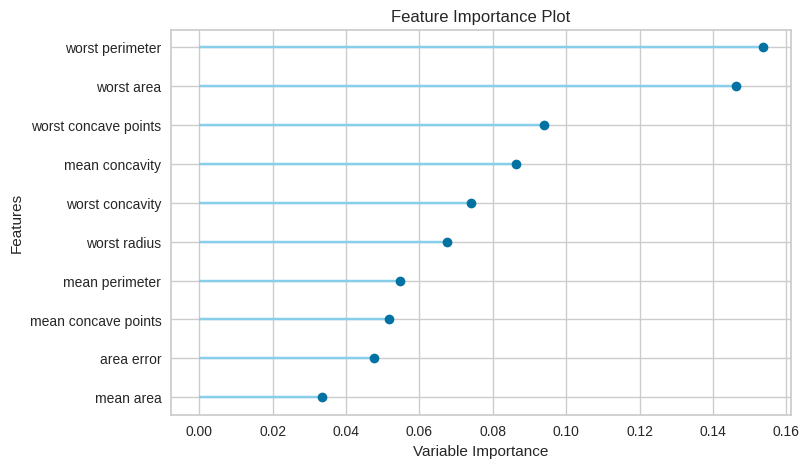

In [ ]:
# 모델 1개에서 바라보는 중요한 피처 정보
plot_model(tune_model_gbc, plot = 'feature')

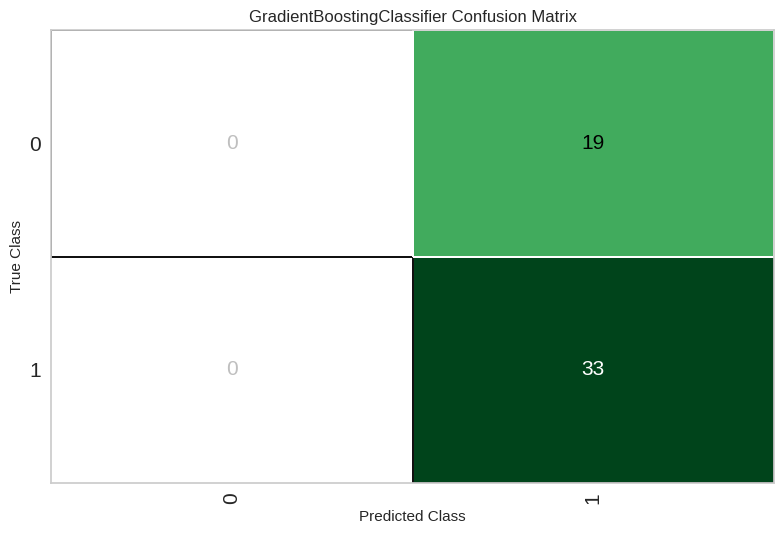

In [ ]:
# 모델 1개에서 체크된 혼동행렬
plot_model(tune_model_gbc, plot = 'confusion_matrix')

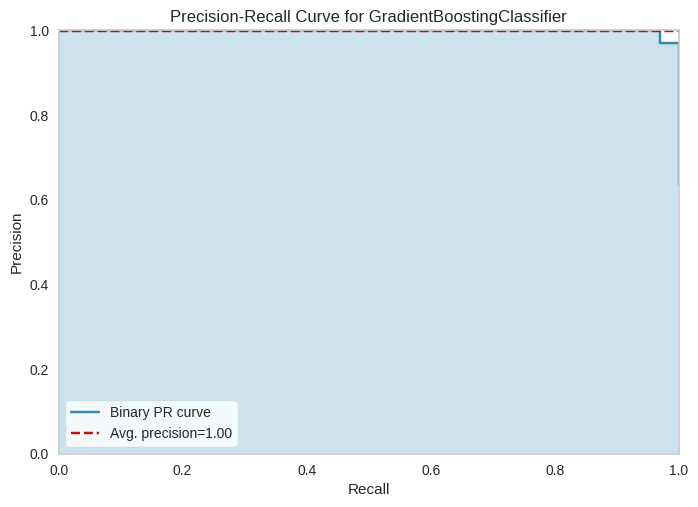

In [ ]:
# 모델 1개에서 체크된  x:recall, y:precision
plot_model(tune_model_gbc, plot = 'pr')

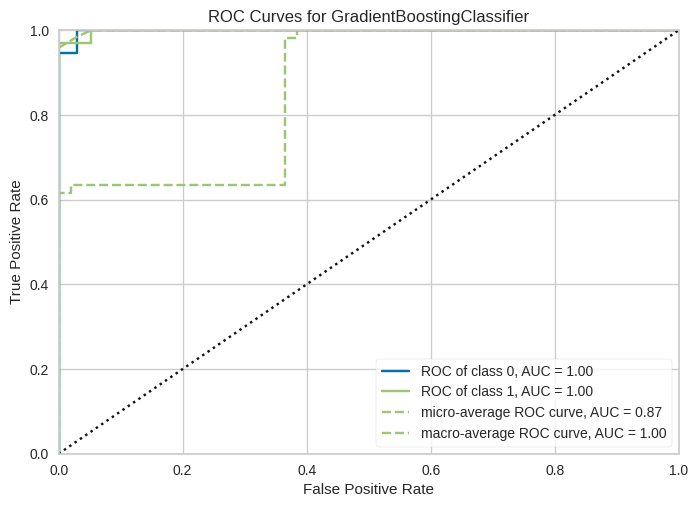

In [ ]:
# 모델 1개에서 auc, roc 차트
plot_model(tune_model_gbc, plot = 'auc')

### 모델별 테스트 데이터 예측 성능 출력

In [ ]:
for model in candidate_models:
    y_pred = predict_model(model, data = X_test, verbose = False)
    print(model.__class__, accuracy_score(y_test.malignant, y_pred.prediction_label))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 0.631578947368421
<class 'catboost.core.CatBoostClassifier'> 0.9824561403508771
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
<class 'lightgbm.sklearn.LGBMClassifier'> 0.9473684210526315
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'> 0.9824561403508771
<class 'sklearn.l

### 최종모델

In [ ]:
# 테스트 데이터 결과 catboost, lda 최고점수
final_model_cus = finalize_model(tune_model_cbc)
final_model_cus

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mean radius', 'mean texture',
                                             'mean perimeter', 'mean area',
                                             'mean smoothness',
                                             'mean compactness',
                                             'mean concavity',
                                             'mean concave points',
                                             'mean symmetry',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'perimeter error', 'area error',
                                             'smoothness...
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x7b8858fbfe50>)],
         verbose=False)

### 모델 덤프

In [ ]:
save_model(final_model_cus, 'pycaret_automl_cb_final_20230908')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['mean radius', 'mean texture',
                                              'mean perimeter', 'mean area',
                                              'mean smoothness',
                                              'mean compactness',
                                              'mean concavity',
                                              'mean concave points',
                                              'mean symmetry',
                                              'mean fractal dimension',
                                              'radius error', 'texture error',
                                              'perimeter error', 'area error',
                                              'smoothness...
                 ('normalize',
                  TransformerWrapper(exclude=None, inclu

### 모델 로드

In [ ]:
loaded_model = load_model('/content/pycaret_automl_cb_final_20230908')

# 테스트
y_pred = predict_model(loaded_model, data = X_test, verbose = False)
print(loaded_model.__class_, accuracy_score(y_test.malignant, y_pred.prediction_label))

Transformation Pipeline and Model Successfully Loaded


AttributeError: ignored

# AutoML - 파이캐럿 - 회귀편